In [34]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [35]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [36]:
!pip install inference

impor dataset roboflow


In [37]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("project-5eubn").project("berry-tl6xj")
version = project.version(1)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


run


In [38]:
train_dir = f"{dataset.location}/train/images"
test_dir = f"{dataset.location}/test/images"


In [39]:
train_images = len([img for img in os.listdir(train_dir) if img.endswith('.jpg') or img.endswith('.png')])
test_images = len([img for img in os.listdir(test_dir) if img.endswith('.jpg') or img.endswith('.png')])

print(f"Number of images in the training set: {train_images}")
print(f"Number of images in the testing set: {test_images}")

Number of images in the training set: 2430
Number of images in the testing set: 111


In [40]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/berry-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [41]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1732358354.1ae50cb5c25d.1186.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


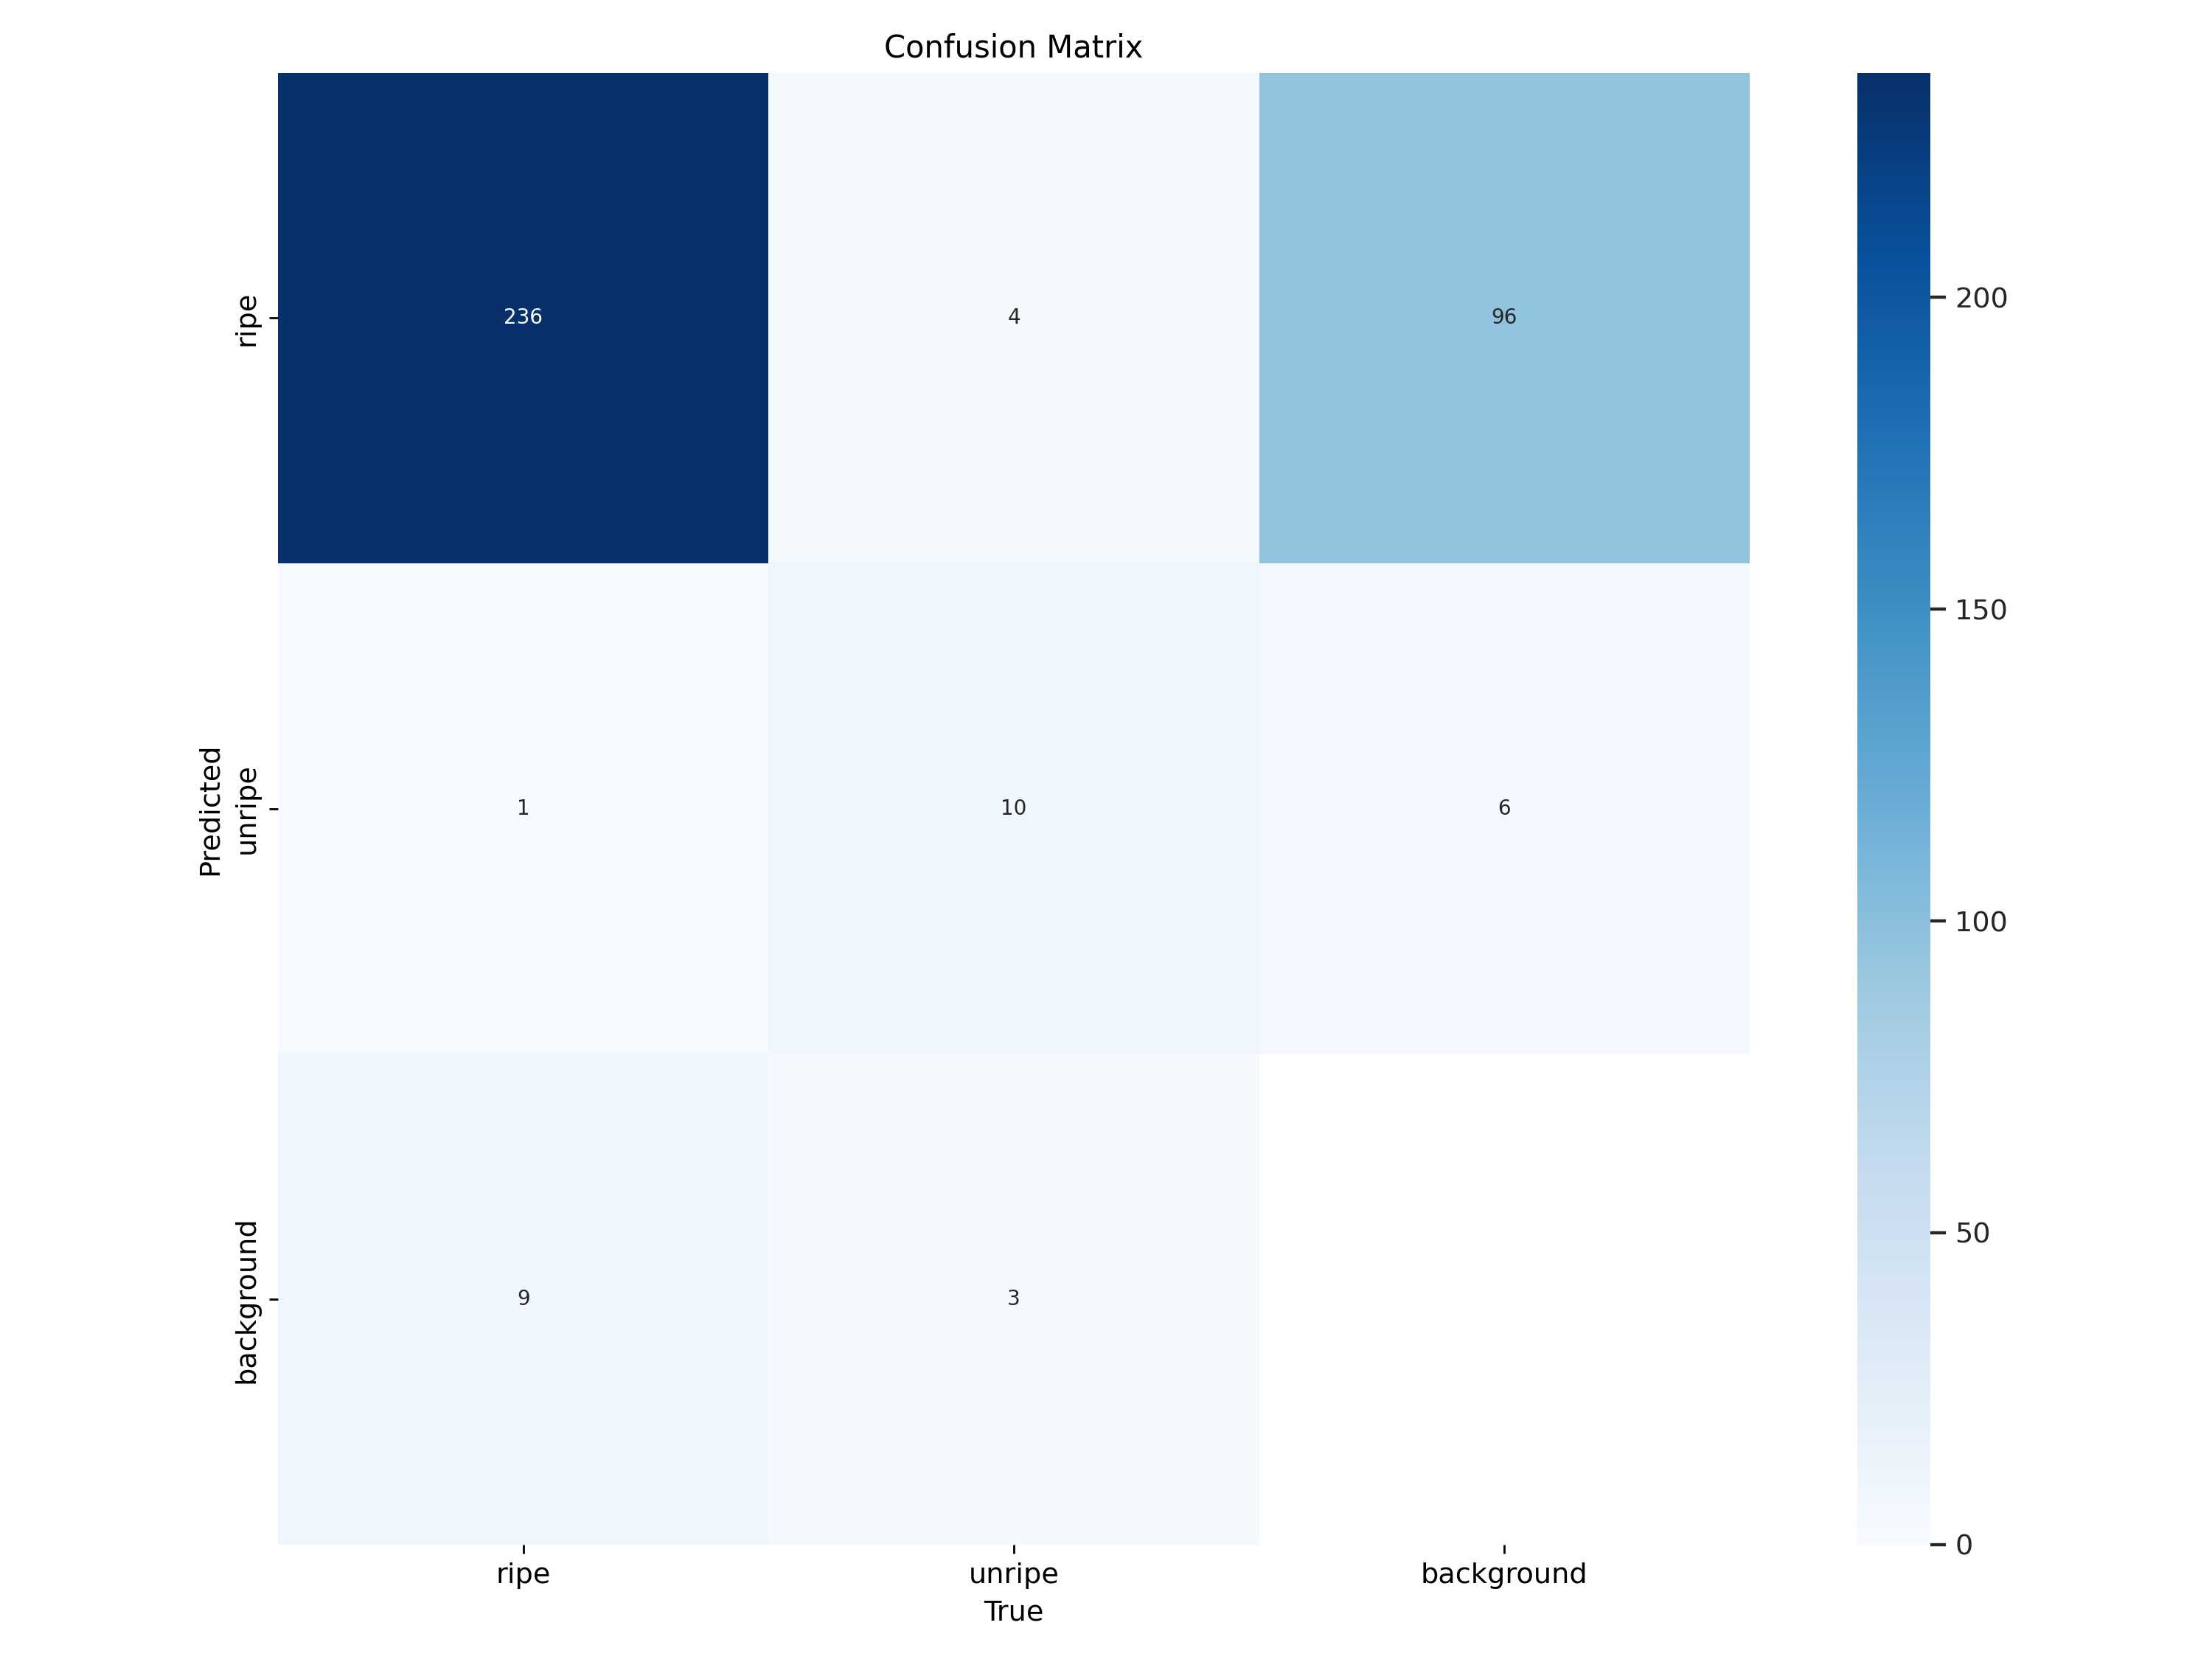

In [42]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

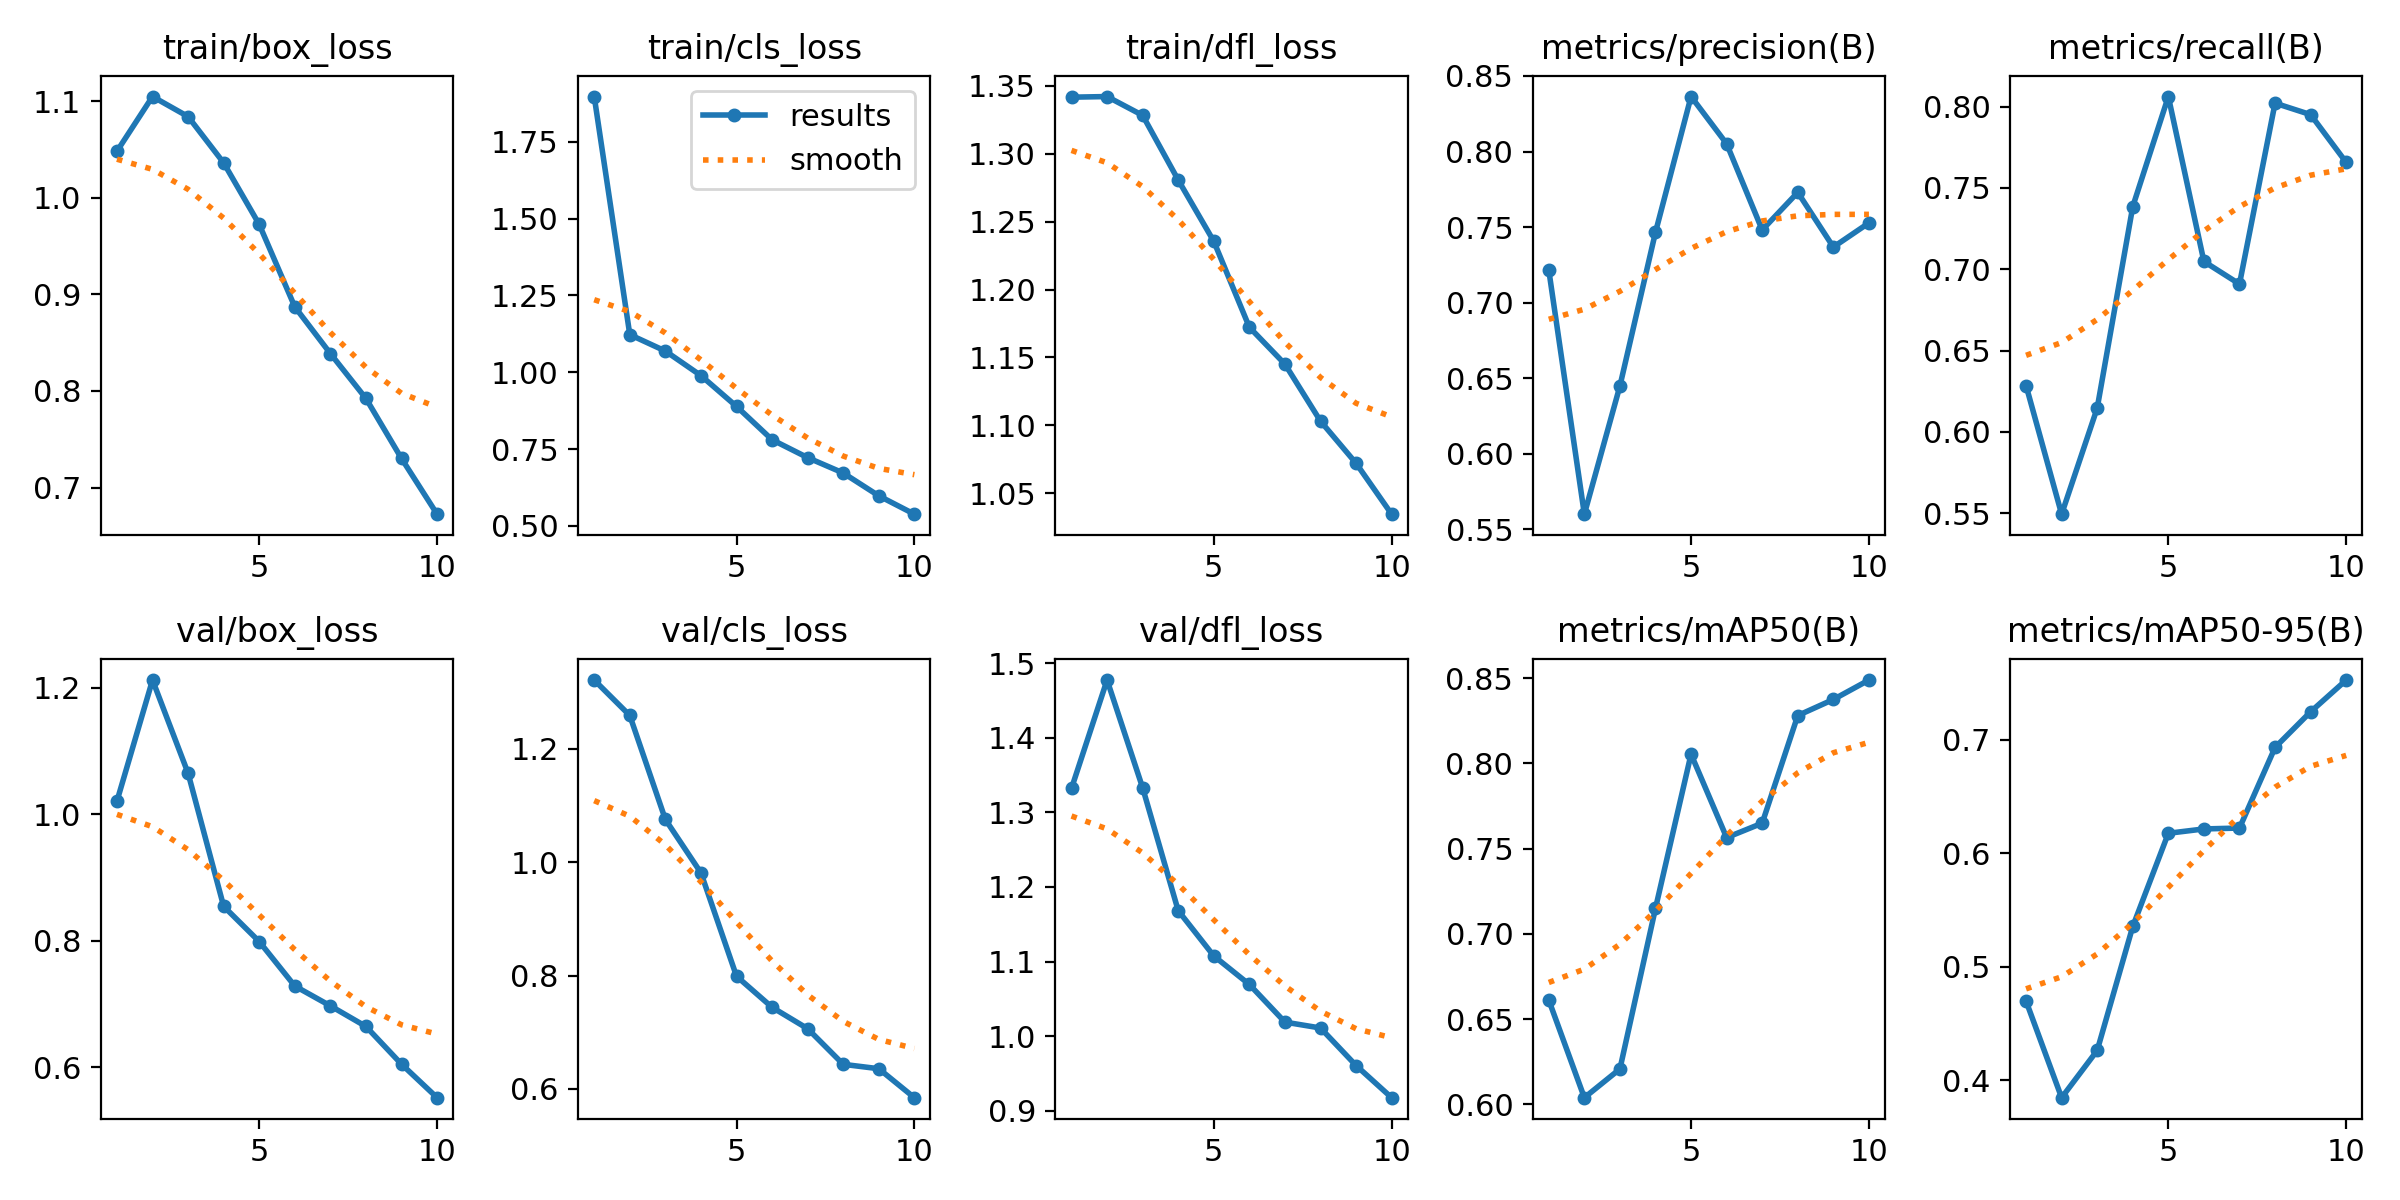

In [43]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

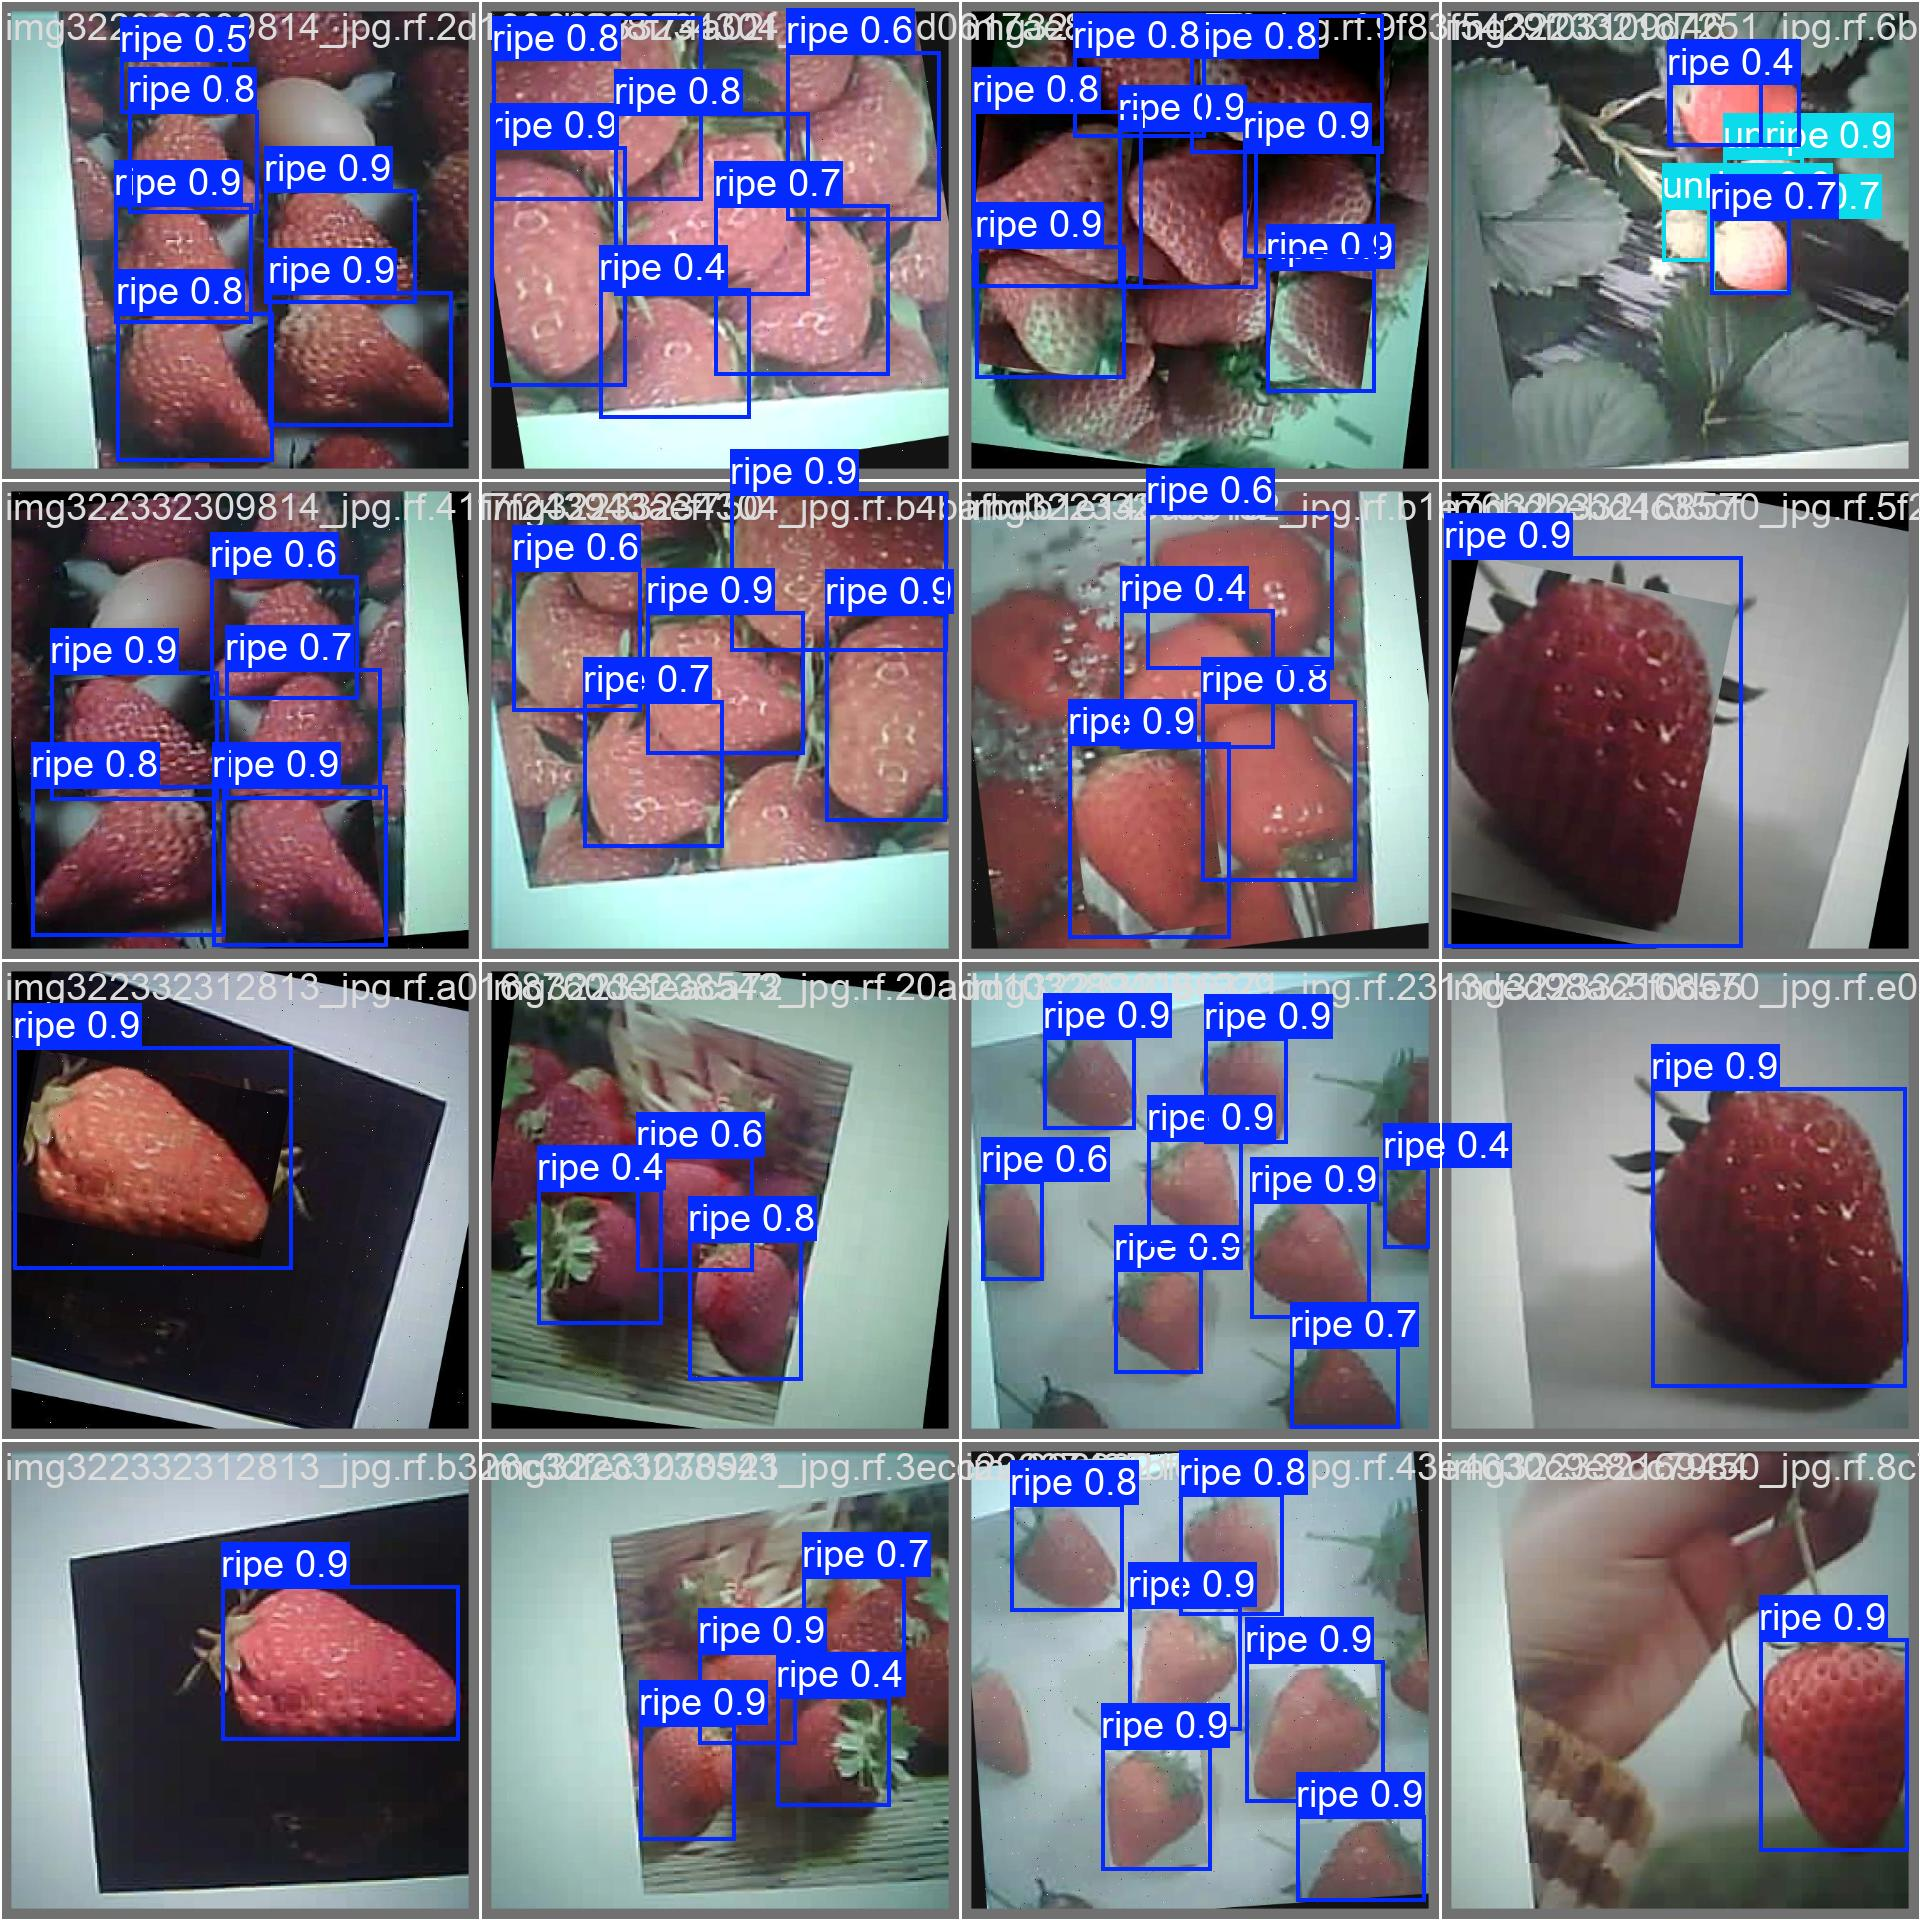

In [44]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [45]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/berry-1/valid/labels.cache... 110 images, 0 backgrounds, 0 corrupt: 100% 110/110 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:03<00:00,  1.78it/s]
                   all        110        263      0.752      0.766      0.847       0.75
                  ripe        110        246      0.771      0.944      0.932      0.831
                unripe         11         17      0.734      0.588      0.762      0.669
Speed: 1.5ms preprocess, 13.1ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/111 /content/datasets/berry-1/test/images/img287129355496_jpg.rf.ef4e46fbb11a9ec3e23f7848a4fb7e24.jpg: 640x640 1 ripe, 15.6ms
image 2/111 /content/datasets/berry-1/test/images/img287129357415_jpg.rf.1c902fa58e3ac522185d8a25102a9abc.jpg: 640x640 1 ripe, 15.6ms
image 3/111 /content/datasets/berry-1/test/images/img287129359374_jpg.rf.95d9d8c396c7caef32ae2f20196736dc.jpg: 640x640 3 ripes, 15.6ms
image 4/111 /content/datasets/berry-1/test/images/img287129360034_jpg.rf.8cc7c33d8233f8923e52253fade23f87.jpg: 640x640 4 ripes, 15.5ms
image 5/111 /content/datasets/berry-1/test/images/img287129360694_jpg.rf.7d53263ec3756b8c955b9f2690d81145.jpg: 640x640 1 ripe, 15.5ms
image 6/111 /content/datasets/berry-1/test/images/img287129360694_jpg.rf.e24de4d06761939859924f5bf97e4cd8.jpg: 640x640 1 ripe, 15.5ms
image 7/111 /content/datase

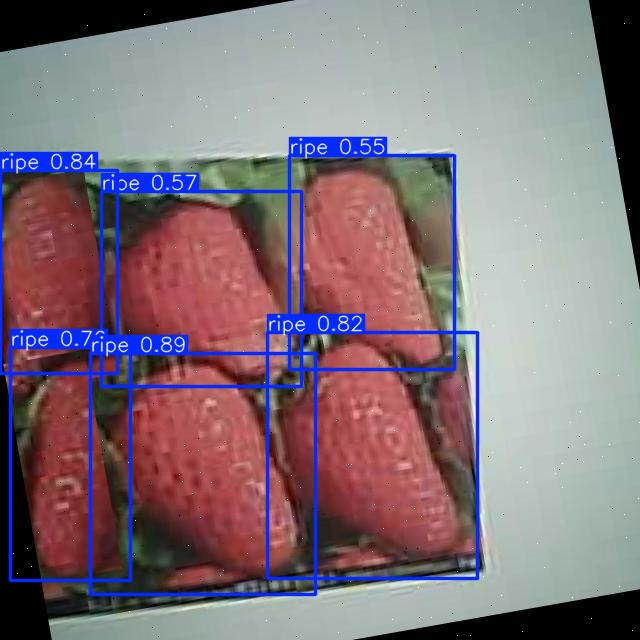

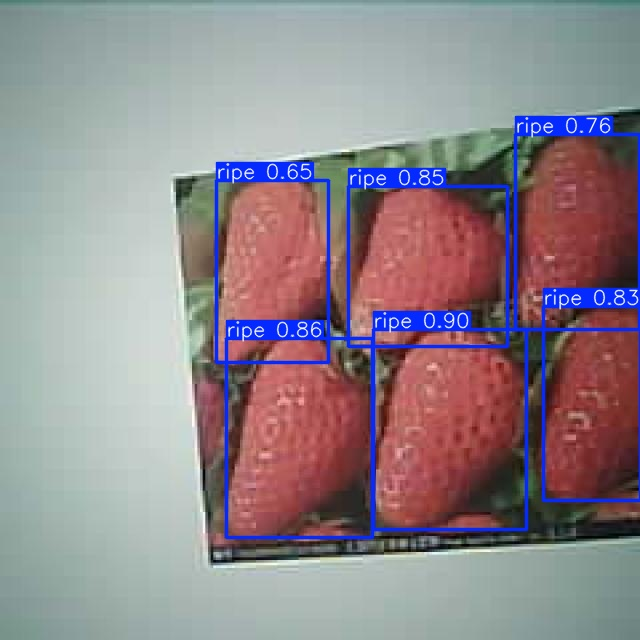

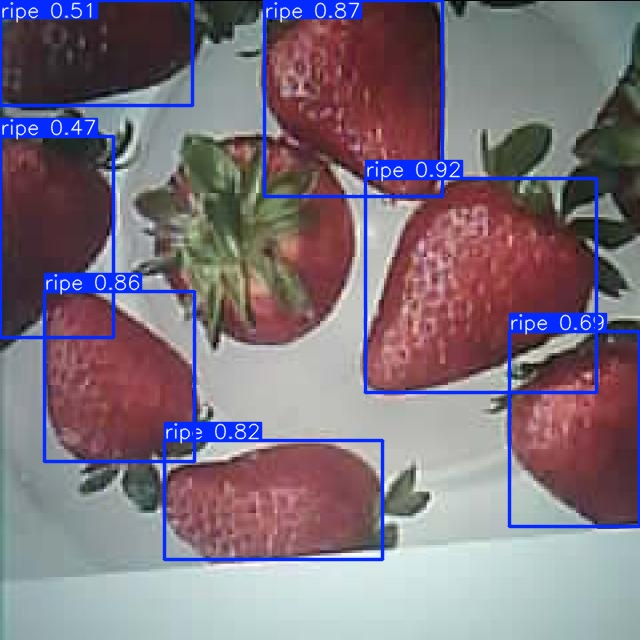

In [46]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

download the content


In [47]:
%cd /content/

/content


In [48]:
!zip -r datasets.zip datasets


Streaming output truncated to the last 5000 lines.
  adding: datasets/berry-1/train/images/Strawberry-Unripe-Fruit-Immature-Yellow-Strawberry-5516260_jpg.rf.7f6f25cbd97864b6b2ba19334a7a176a.jpg (deflated 1%)
  adding: datasets/berry-1/train/images/-6065-_jpg.rf.d31fdc515ed39ec698b84f50f7dea106.jpg (deflated 0%)
  adding: datasets/berry-1/train/images/img200430258255_jpg.rf.c1f88dea626397452bd2b7fb9815cb3f.jpg (deflated 11%)
  adding: datasets/berry-1/train/images/img287129132065_jpg.rf.1bcc4ad371ce16fbd528e0032e0f8aa6.jpg (deflated 1%)
  adding: datasets/berry-1/train/images/img200430260054_jpg.rf.0af10775f3f2808c3aa15c613664d624.jpg (deflated 1%)
  adding: datasets/berry-1/train/images/510175383_fa745238c3_b_jpg.rf.4fba0b08940fd638b5c5e3334a72abe4.jpg (deflated 1%)
  adding: datasets/berry-1/train/images/10ffbbdd_jpg.rf.fa0a28c0b80b587bf401eda45be12706.jpg (deflated 1%)
  adding: datasets/berry-1/train/images/images116_jpg.rf.0f33cca94f5a55305c9a92c748b16f2a.jpg (deflated 8%)
  adding

In [49]:
!zip -r runs.zip runs


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train3/ (stored 0%)
  adding: runs/detect/train3/train_batch6080.jpg (deflated 7%)
  adding: runs/detect/train3/results.png (deflated 7%)
  adding: runs/detect/train3/confusion_matrix.png (deflated 38%)
  adding: runs/detect/train3/R_curve.png (deflated 12%)
  adding: runs/detect/train3/P_curve.png (deflated 14%)
  adding: runs/detect/train3/val_batch1_labels.jpg (deflated 8%)
  adding: runs/detect/train3/F1_curve.png (deflated 13%)
  adding: runs/detect/train3/weights/ (stored 0%)
  adding: runs/detect/train3/weights/last.pt (deflated 8%)
  adding: runs/detect/train3/weights/best.pt (deflated 8%)
  adding: runs/detect/train3/labels_correlogram.jpg (deflated 34%)
  adding: runs/detect/train3/val_batch2_pred.jpg (deflated 8%)
  adding: runs/detect/train3/val_batch0_labels.jpg (deflated 10%)
  adding: runs/detect/train3/train_batch6081.jpg (deflated 9%)
  adding: runs/detect/train3/confusion_matrix_norma